## Data Cleaning for ML

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [34]:
dataset = pd.read_csv("loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Filling Null Value

In [37]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
(dataset.isnull().sum()/dataset.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

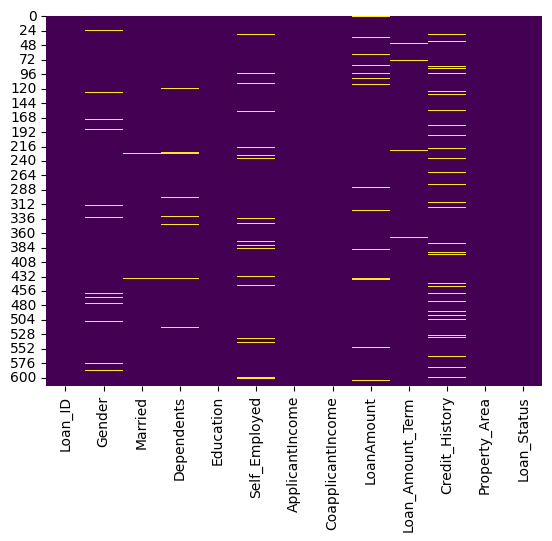

In [39]:
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()  

## Filling Category Dataset

In [40]:
for col in dataset.select_dtypes(include=["object", "category"]).columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)


C:\Users\Vikas\AppData\Local\Temp\ipykernel_7984\31547982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [41]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:

num_imputer = SimpleImputer(strategy="mean")

num_cols = dataset.select_dtypes(include=["float64", "int64"]).columns

dataset[num_cols] = num_imputer.fit_transform(dataset[num_cols])


In [44]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Detecting and Removing Outliers

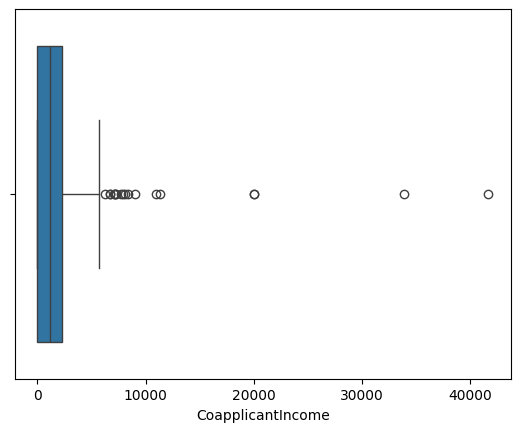

In [54]:
sns.boxplot(x = "CoapplicantIncome", data=dataset)
plt.show()


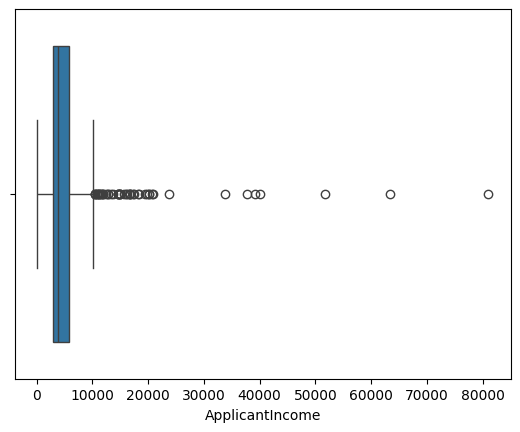

In [55]:
sns.boxplot(x = "ApplicantIncome", data=dataset)
plt.show()

In [56]:
dataset.shape

(614, 13)

In [63]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
IQR = q3 - q1
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

min_range , max_range
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

In [64]:
dataset.shape

(614, 13)

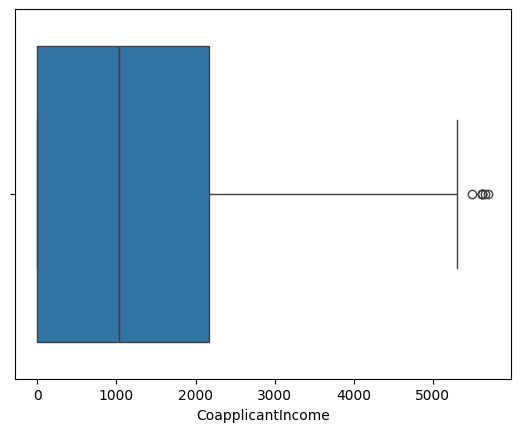

In [65]:
sns.boxplot(x="CoapplicantIncome",data=new_dataset)
plt.show()

# Scaling

In [69]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [77]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_SS"] = pd.DataFrame(ss.transform(dataset[["CoapplicantIncome"]]),columns=["CoapplicantIncome_SS"])

In [82]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_SS,CoapplicantIncome_SS
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,-4.339634e-18,4.050325e-17
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,1.000815e+00,1.000815e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,-8.606493e-01,-5.544873e-01
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,-4.138159e-01,-5.544873e-01
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,-2.606393e-01,-1.480047e-01
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,6.414426e-02,2.312023e-01
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.238462e+01,1.369617e+01


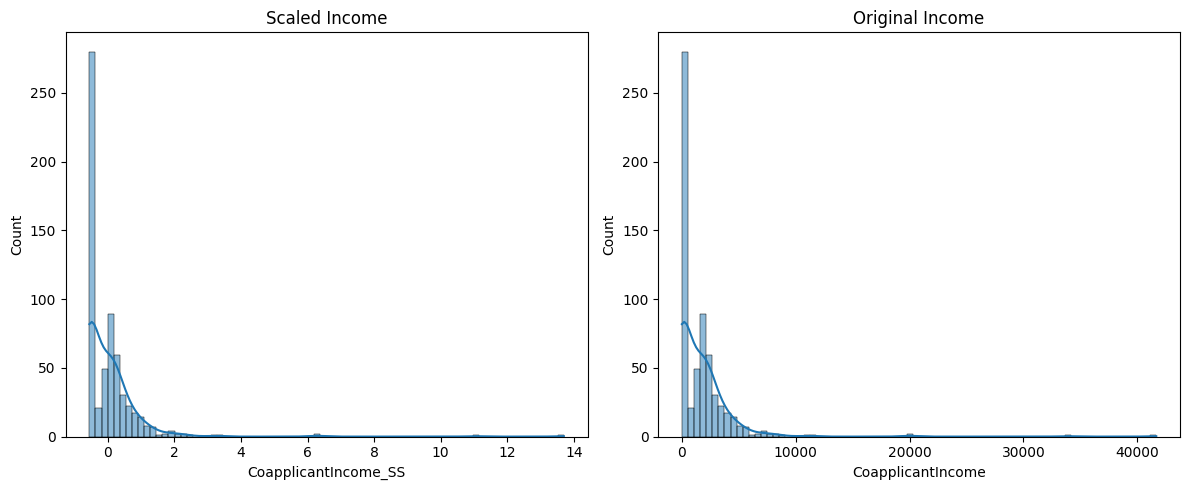

In [84]:
# Plotting the distributions of original and scaled income

plt.figure(figsize=(12, 5))  # Optional: Adjust figure size

plt.subplot(1, 2, 1)
sns.histplot(dataset["CoapplicantIncome_SS"], kde=True)  # Use histplot instead of deprecated distplot
plt.title("Scaled Income")

plt.subplot(1, 2, 2)
sns.histplot(dataset["CoapplicantIncome"], kde=True)
plt.title("Original Income")

plt.tight_layout()
plt.show()


In [85]:
dataset.duplicated().sum()

np.int64(0)

In [86]:
dataset.drop_duplicates(inplace=True)

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            614 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         614 non-null    object 
 6   ApplicantIncome       614 non-null    float64
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  ApplicantIncome_SS    614 non-null    float64
 14  CoapplicantIncome_SS  614 non-null    float64
dtypes: float64(7), object(8